In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def monte_carlo_discounted_cash_flow(n_trials=100000, n_periods=10, r_0=1.09, dr_0=.16, r_n=1.09, dr_n=.16, C_0=10, discount_rate=.1, terminal_multiple=15):
    '''
    n_trials: number of trials
    n_periods: number of periods

    r_0: initial growth
    dr_0: uncertainty of initial growth

    r_n: terminal growth
    dr_n: uncertainty of terminal growth

    C0: initial cash flow per share

    discount_rate: discount rate per period

    terminal_multiple: terminal multiple applied to last cash flow
    '''

    r_arr = np.linspace(r_0, r_n, n_periods)
    dr_arr = np.linspace(dr_0, dr_n, n_periods)

    r_matrix = np.random.normal(size=(n_trials, n_periods))* dr_arr + r_arr 
    cash_flow_matrix = C_0 * r_matrix.cumprod(axis=1)

    discount_rate_arr = (np.ones(n_periods) * 1 / (1 + discount_rate)).cumprod()

    discounted_cash_flow_matrix = cash_flow_matrix * discount_rate_arr

    terminal_value_arr = discounted_cash_flow_matrix[:, -1] * terminal_multiple

    fair_values_arr = discounted_cash_flow_matrix.sum(axis=1) + terminal_value_arr
    
    return fair_values_arr, cash_flow_matrix, discounted_cash_flow_matrix

cash flows:


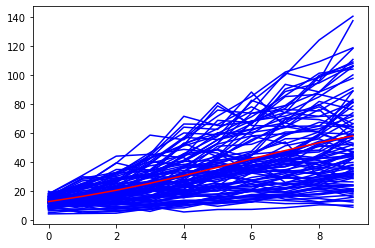

discounted cash flows:


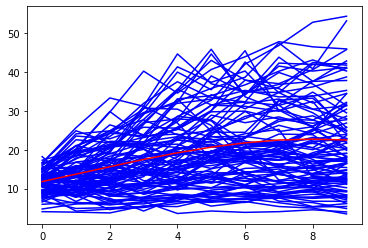

fair values distribution:


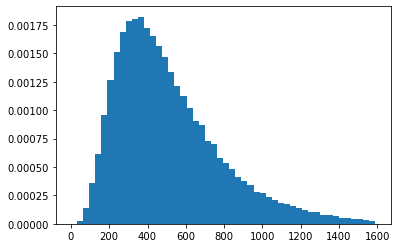

probability of being undervalued:


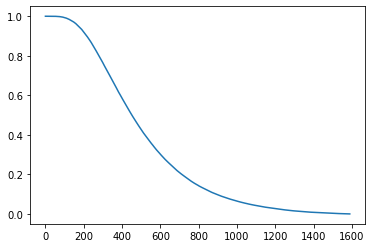

fair value: 455.68


In [15]:
fair_values_arr, cash_flow_matrix, discounted_cash_flow_matrix = monte_carlo_discounted_cash_flow(r_0=1.3, dr_0=0.3)

print('cash flows:')

for cash_flow_arr in cash_flow_matrix[:100]:
    plt.plot(range(len(cash_flow_arr)), cash_flow_arr, c='b')
    
mean_cash_flow = cash_flow_matrix.mean(axis=0)
plt.plot(range(len(mean_cash_flow)), mean_cash_flow, c='r')
plt.show()

print('discounted cash flows:')

for discounted_cash_flow_arr in discounted_cash_flow_matrix[:100]:
    plt.plot(range(len(discounted_cash_flow_arr)), discounted_cash_flow_arr, c='b')
    

mean_discounted_cash_flow = discounted_cash_flow_matrix.mean(axis=0)
plt.plot(range(len(mean_discounted_cash_flow)), mean_discounted_cash_flow, c='r')
plt.show()

print('fair values distribution:')

plt.hist(fair_values_arr, bins=50, range=(0, np.percentile(fair_values_arr, 99)), density=True)
plt.show()

print('probability of being undervalued:')

p_x, x = np.histogram(fair_values_arr, bins=1000, range=(0, np.percentile(fair_values_arr, 99)))
cdf = p_x.cumsum() / p_x.sum()

plt.plot(x[:-1], 1 - cdf)
plt.show()

print(f'fair value: {np.median(fair_values_arr):.2f}')